# pyGAMI wanted to test out and get a feel for the pyGAM package, as I have been working a lot with GAMs in R## Import packages & data

In [123]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston

# Load the boston dataset.
boston = load_boston()
X, y = boston['data'], boston['target']

In [124]:
X.shape

(506, 13)

## Plot features against target

In [125]:
cols = 4
rows = X.shape[1] // cols + 1
rows

4

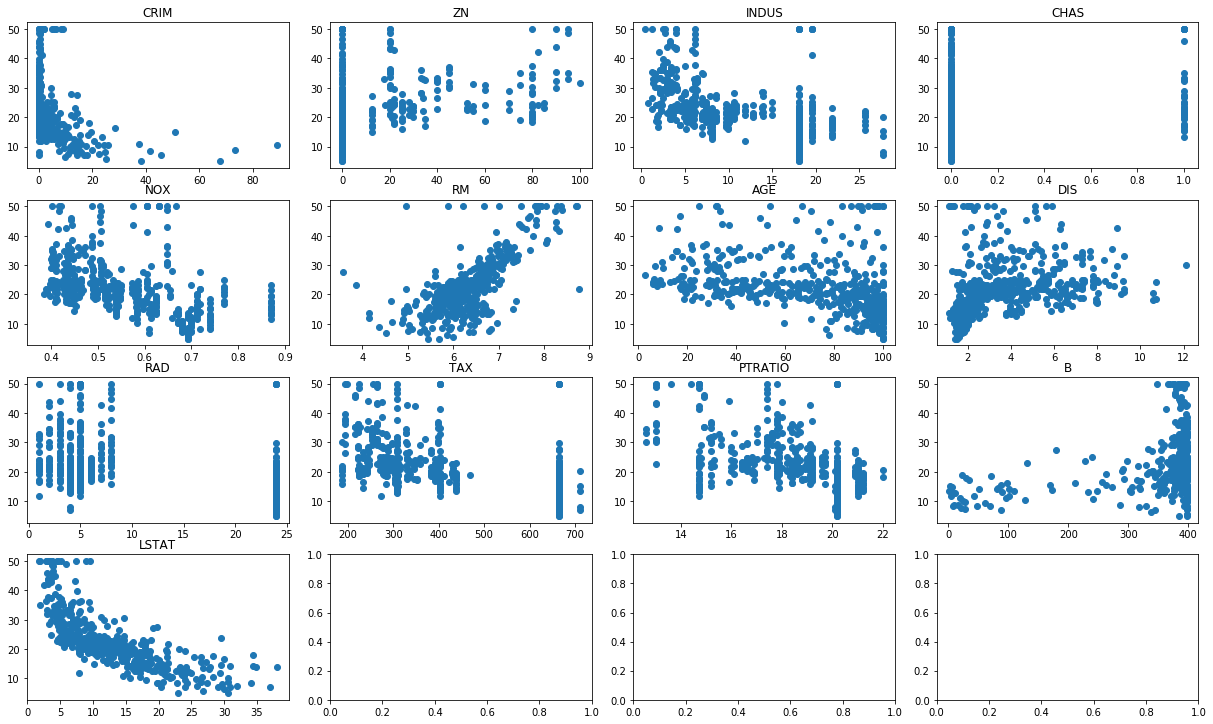

In [127]:
dims = [rows, cols]

fig, axs = plt.subplots(nrows=dims[0], ncols=dims[1], figsize=(17,10))
plt.tight_layout()

for row in range(dims[0]):
    for col in range(dims[1]):
        index = row*dims[1] + col
        
        if index < X.shape[1]:
            tmp = X[:,index]
            axs[row, col].scatter(tmp,y)
            axs[row, col].set_title(boston.feature_names[index])
plt.show()

# GAM fit basic

We'll start by building the model expression. We donøt want the default setting for splines as these a too wiggly (for my taste at least for now).

In [128]:
from pygam import LinearGAM, s, l, f

for i in range(X.shape[1]):
    if i == 0:
        terms = s(i, n_splines=6)
    else:
        terms = terms + s(i, n_splines=6)

terms

gam = LinearGAM(terms).fit(X, y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     30.7446
Link Function:                     IdentityLink Log Likelihood:                                  -1824.107
Number of Samples:                          506 AIC:                                             3711.7031
                                                AICc:                                            3716.0959
                                                GCV:                                               15.9276
                                                Scale:                                             14.1956
                                                Pseudo R-Squared:                                   0.8421
Feature Function                  Lam

Just messing around with the gam object, looking at methos for instance to get p-values for all fitted features.

In [130]:
#dir(gam)
gam.statistics_['p_values']

[4.5928627123714705e-08,
 0.23197840225745192,
 0.029466337781754115,
 0.0006456713860633068,
 5.353644194627805e-10,
 1.1102230246251565e-16,
 0.645314085316843,
 3.788417801686705e-09,
 0.00014264429797705702,
 2.6557809513660935e-05,
 1.4915269019866173e-10,
 0.004045501218849501,
 1.1102230246251565e-16,
 1.1102230246251565e-16]

Now let's plot the partial fits.

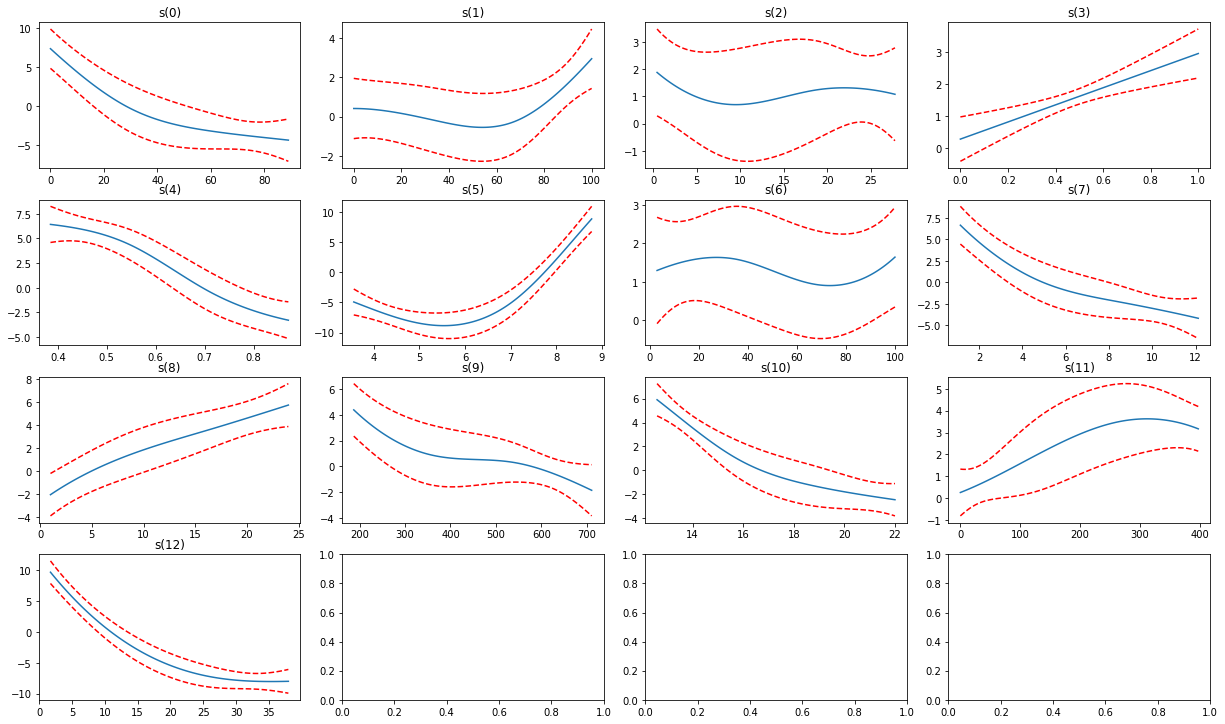

In [131]:
fig, axs = plt.subplots(nrows=dims[0], ncols=dims[1], figsize=(17,10))
plt.tight_layout()

for row in range(dims[0]):
    for col in range(dims[1]):
        i = row*dims[1] + col
        
        if i < len(gam.terms)-1:
            term = gam.terms[i]
        
            if term.isintercept:
                continue
        
            XX = gam.generate_X_grid(term=i)
            pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
            axs[row, col].plot(XX[:, term.feature], pdep)
            axs[row, col].plot(XX[:, term.feature], confi, c='r', ls='--')
            axs[row, col].set_title(str(repr(gam.terms[i])))

plt.show()